Q3

This problem involves the Boston data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capital
crime rate is the response, and the other variables are the predictors.

In [1]:
!pip install ISLP

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data

boston = load_data('Boston')
boston

c:\Users\sabri\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


(a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically signifcant association between the predictor
and the response? Create some plots to back up your assertions.

Linear model for predictor: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.51e-06
Time:                        23:18:43   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537

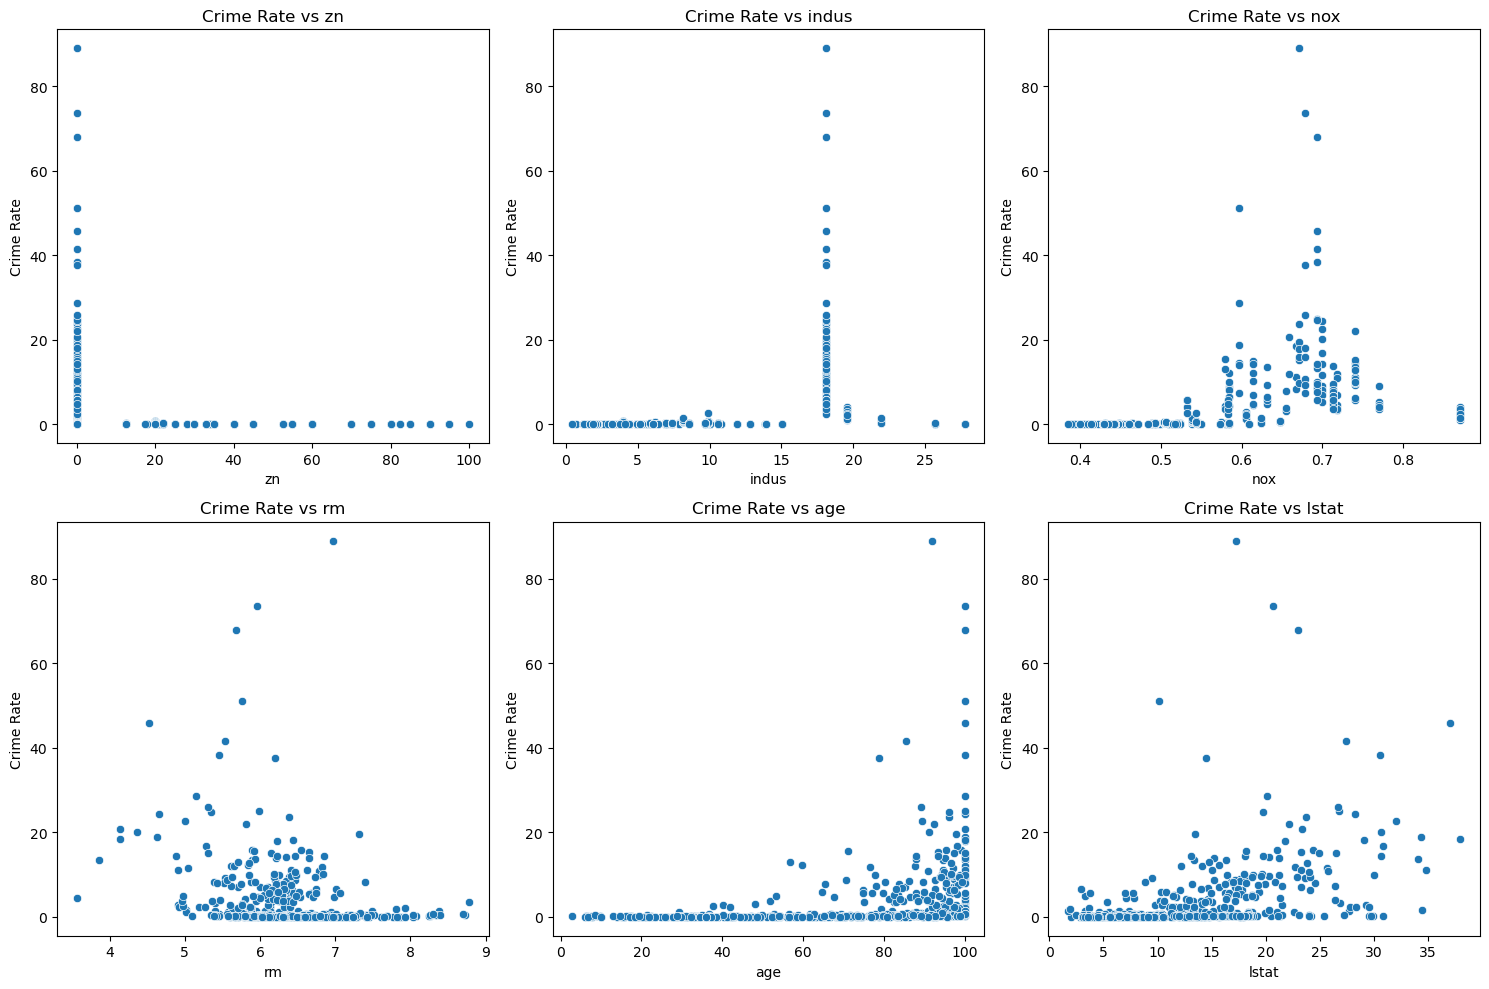

In [7]:
import statsmodels.api as sm

# Function to fit and summarize a simple linear regression model
def fit_linear_model(predictor, response="crim"):
    X = sm.add_constant(boston[predictor])
    y = boston[response]
    model = sm.OLS(y, X).fit()
    return model.summary()

# Let's check the association of each predictor with the crime rate and gather the summaries.
predictors = boston.columns[1:]  # All columns except the response 'crim'
model_summaries = {predictor: fit_linear_model(predictor) for predictor in predictors}

# Displaying summaries
for predictor, summary in model_summaries.items():
    print(f"Linear model for predictor: {predictor}")
    print(summary)
    print("\n")

# Plotting relationships between a few predictors and crime rate (crim)
plt.figure(figsize=(15, 10))

# Scatter plots for key predictors against crime rate
for i, predictor in enumerate(['zn', 'indus', 'nox', 'rm', 'age', 'lstat'], start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=boston[predictor], y=boston['crim'])
    plt.title(f'Crime Rate vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Crime Rate')

plt.tight_layout()
plt.show()

In [9]:
# Function to fit a simple linear regression model and return R-squared
def get_r_squared(predictor, response="crim"):
    X = sm.add_constant(boston[predictor])
    y = boston[response]
    model = sm.OLS(y, X).fit()
    return model.rsquared

# Get R-squared for each predictor
r_squared_values = {predictor: get_r_squared(predictor) for predictor in predictors}

# Sort predictors by R-squared value in descending order
sorted_r_squared = sorted(r_squared_values.items(), key=lambda x: x[1], reverse=True)

# Select the top 6 predictors
top_6_predictors = sorted_r_squared[:6]

# Display the top 6 predictors
print("Top 6 predictors most associated with crim:")
for predictor, r_squared in top_6_predictors:
    print(f"{predictor}: R^2 = {r_squared:.3f}")

Top 6 predictors most associated with crim:
rad: R^2 = 0.391
tax: R^2 = 0.340
lstat: R^2 = 0.208
nox: R^2 = 0.177
indus: R^2 = 0.165
medv: R^2 = 0.151


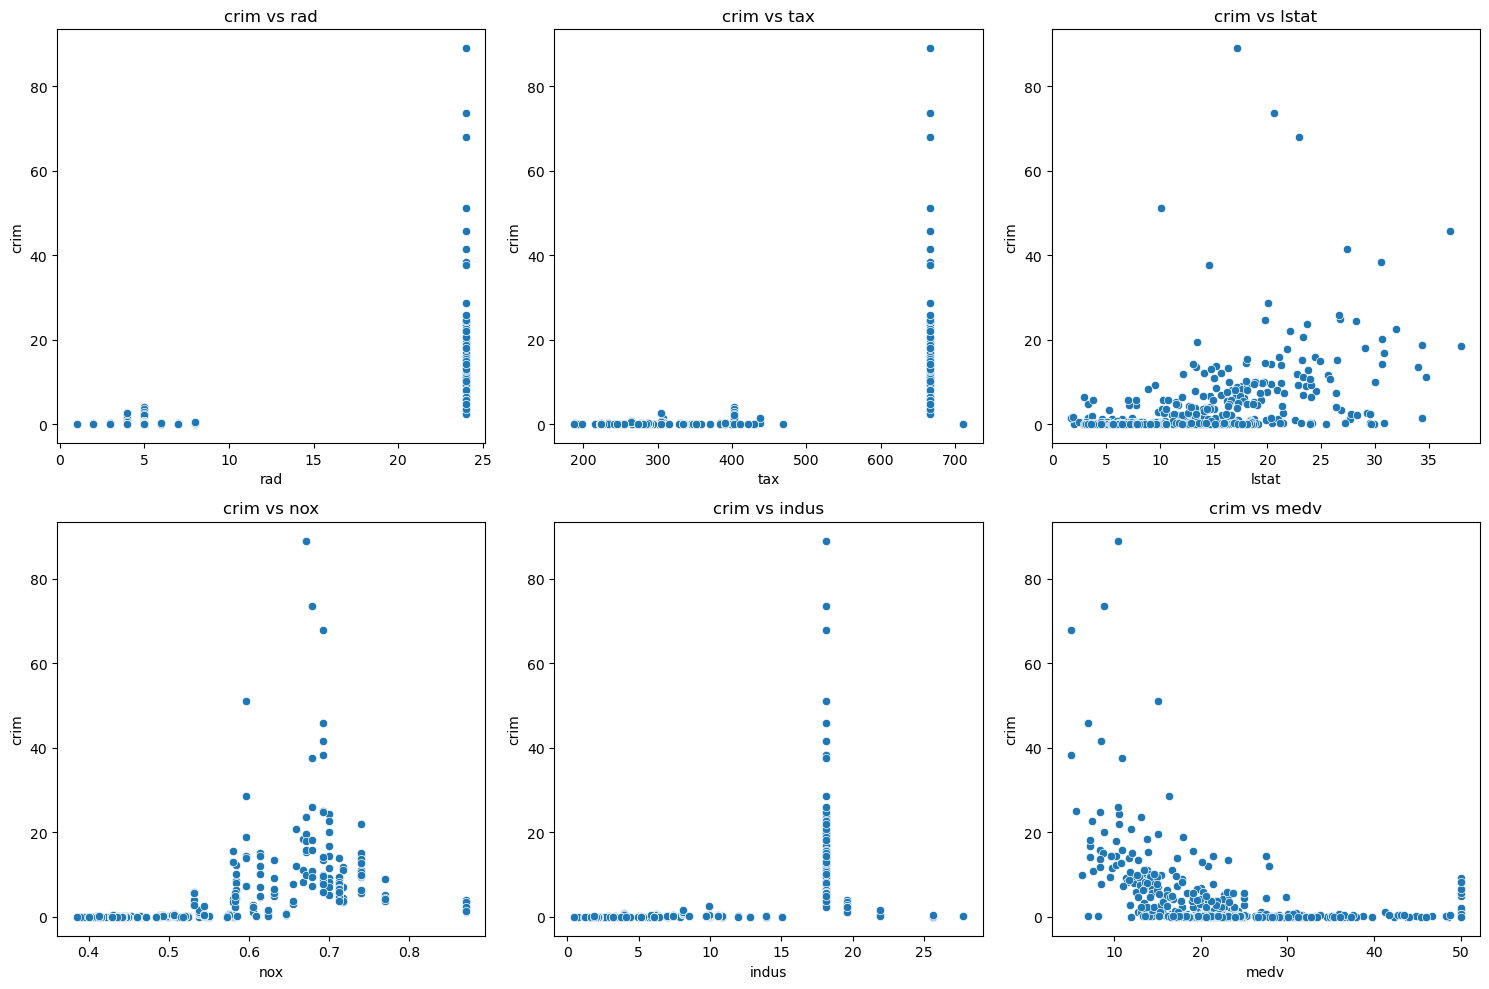

In [12]:

# List of top 6 predictors
top_6_predictor_names = [predictor for predictor, r_squared in top_6_predictors]

# Set up the plotting area
plt.figure(figsize=(15, 10))

# Create scatter plots for each of the top 6 predictors
for i, predictor in enumerate(top_6_predictor_names, start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=boston[predictor], y=boston['crim'])
    plt.title(f'crim vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('crim')

plt.tight_layout()
plt.show()

By ranking all the predictors by their R square values and print the six most strongly associated with 'crim'

(b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis H0 : βj = 0?

In [18]:
# Function to fit and summarize a multiple regression model
def fit_multiple_model(predictors, response="crim"):
    X = sm.add_constant(boston[predictors])
    y = boston[response]
    model = sm.OLS(y, X).fit()
    return model.summary()

# Define all predictors for multiple regression
predictors = boston.columns.drop('crim')  # All columns except 'CRIM'

# Fit the multiple regression model
multiple_model_summary = fit_multiple_model(predictors)

# Display the multiple regression summary
print(multiple_model_summary)

# # Plotting relationships between the most significant predictors and CRIM
# # Selecting top 6 significant predictors based on prior analysis
# top_predictors = ['lstat', 'rm', 'ptratio', 'indus', 'tax', 'nox']

# # Set up the plotting area
# plt.figure(figsize=(15, 10))

# # Scatter plots for each of the top 6 predictors
# for i, predictor in enumerate(top_predictors, start=1):
#     plt.subplot(2, 3, i)
#     sns.scatterplot(x=boston[predictor], y=boston['crim'])
#     plt.title(f'crim vs {predictor}')
#     plt.xlabel(predictor)
#     plt.ylabel('crim')

# plt.tight_layout()
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           2.03e-56
Time:                        11:19:38   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

Based on the results of the multiple regression model, we can reject the null hypothesis for predictors where the p-value is less than 0.05. 

In conclusion, we reject the null hypothesis for most predictors except for INDUS and AGE, meaning these two do not show a statistically significant relationship with 'crim.

(c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefcients
from (a) on the x-axis, and the multiple regression coefcients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefcient in a simple linear regression model is shown on the x-axis, and its coefcient estimate
in the multiple linear regression model is shown on the y-axis.


C:\Users\sabri\AppData\Local\Temp\ipykernel_21088\3266809126.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]  # Return the coefficient for the predictor
C:\Users\sabri\AppData\Local\Temp\ipykernel_21088\3266809126.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return model.params[1]  # Return the coefficient for the predictor
C:\Users\sabri\AppData\Local\Temp\ipykernel_21088\3266809126.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

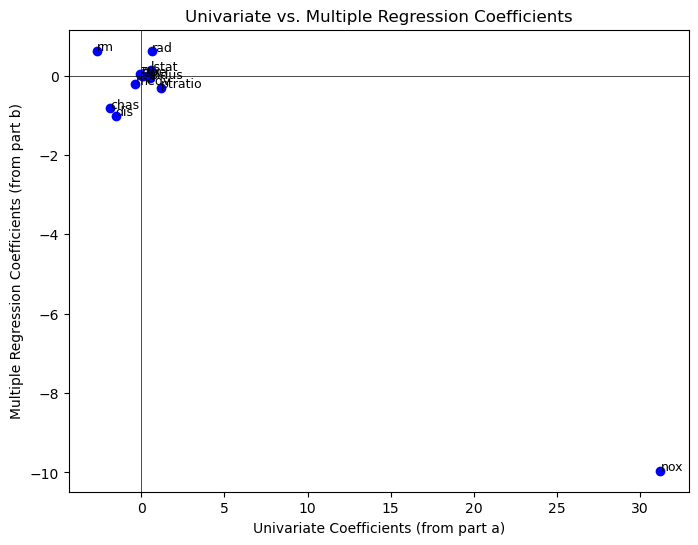

In [22]:
# Step 1: Fit simple linear regression models for each predictor (results from part a)
simple_regression_coefficients = {}

# Function to extract coefficients from a simple linear regression model
def get_simple_coefficient(predictor, response="crim"):
    X = sm.add_constant(boston[predictor])
    y = boston[response]
    model = sm.OLS(y, X).fit()
    return model.params[1]  # Return the coefficient for the predictor

# Get simple regression coefficients for each predictor
for predictor in predictors:
    simple_regression_coefficients[predictor] = get_simple_coefficient(predictor)

# Step 2: Fit the multiple regression model (results from part b)
X = sm.add_constant(boston[predictors])  # Add a constant term for the intercept
y = boston['crim']
multiple_model = sm.OLS(y, X).fit()

# Step 3: Extract the coefficients from the multiple regression model
multiple_regression_coefficients = multiple_model.params[1:]  # Exclude the intercept

# Step 4: Create a plot comparing the univariate and multiple regression coefficients

# Prepare data for plotting
simple_coefficients = list(simple_regression_coefficients.values())
multiple_coefficients = multiple_regression_coefficients.values

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(simple_coefficients, multiple_coefficients, color='blue')

# Add labels to points
for i, predictor in enumerate(predictors):
    plt.text(simple_coefficients[i], multiple_coefficients[i], predictor, fontsize=9)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title("Univariate vs. Multiple Regression Coefficients")
plt.xlabel("Univariate Coefficients (from part a)")
plt.ylabel("Multiple Regression Coefficients (from part b)")

plt.show()

(d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, ft a model of the form

Y = β0 + β1X + β2X2 + β3X3 + e

In [25]:
# Function to fit a polynomial regression model (cubic: X + X^2 + X^3)
def fit_polynomial_model(predictor, response="crim"):
    X = boston[predictor]
    X_poly = np.column_stack((X, X**2, X**3))  # Add quadratic and cubic terms
    X_poly = sm.add_constant(X_poly)  # Add constant (intercept)
    y = boston[response]
    model = sm.OLS(y, X_poly).fit()
    return model.summary()

# Fit polynomial regression models for each predictor and store the summaries
predictors = boston.columns.drop('crim')  # All predictors except CRIM
polynomial_model_summaries = {predictor: fit_polynomial_model(predictor) for predictor in predictors}

# Display summaries of the polynomial models
for predictor, summary in polynomial_model_summaries.items():
    print(f"Polynomial model for predictor: {predictor}")
    print(summary)
    print("\n")

Polynomial model for predictor: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.28e-06
Time:                        11:35:51   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.

The predictors LSTAT, RM, and NOX exhibit evidence of non-linear associations with CRIM, as indicated by the significant p-values for their quadratic and cubic terms. Other predictors either don't show significant non-linear effects or their non-linear terms are not significant.